In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # Operating System

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance-claims-data/insurance_claims_data.csv


In [2]:
# plots / visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import mean, std

In [3]:
data = pd.read_csv('/kaggle/input/insurance-claims-data/insurance_claims_data.csv')

In [4]:
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


# Data Insights

In [5]:
data.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,1994-02-05,IL,100/300,500,1564.43,3000000,477644,...,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,...,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,...,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,2001-12-08,OH,250/500,1000,1235.14,0,443567,...,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
data.shape

(1000, 40)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


# data Cleaning

In [9]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
data = data.drop(columns=['_c39'])

In [11]:
data.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [12]:
print(data['fraud_reported'].value_counts())

fraud_reported
N    753
Y    247
Name: count, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

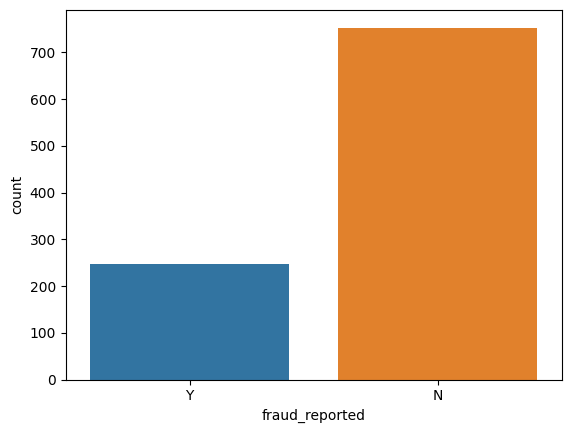

In [13]:
sns.countplot(x='fraud_reported', data=data)

In [14]:
data['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

<Axes: xlabel='incident_state', ylabel='count'>

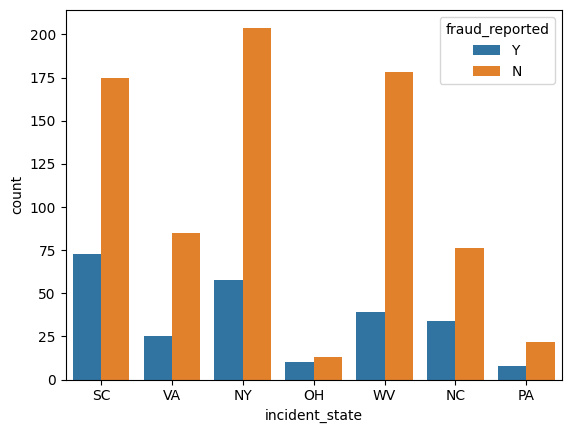

In [15]:
sns.countplot(x='incident_state', data=data, hue='fraud_reported')

<Axes: xlabel='policy_state', ylabel='count'>

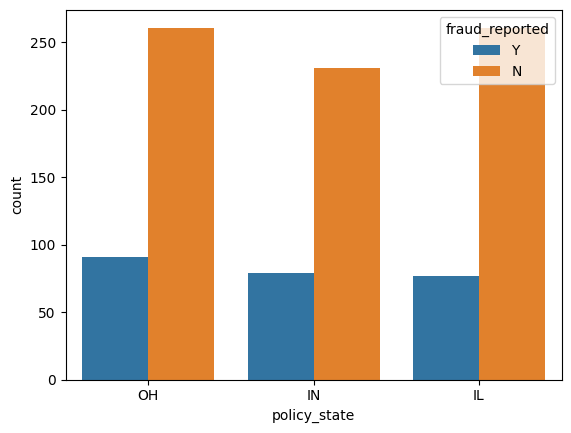

In [16]:
sns.countplot(x='policy_state', data=data, hue='fraud_reported')

<Axes: xlabel='incident_type', ylabel='count'>

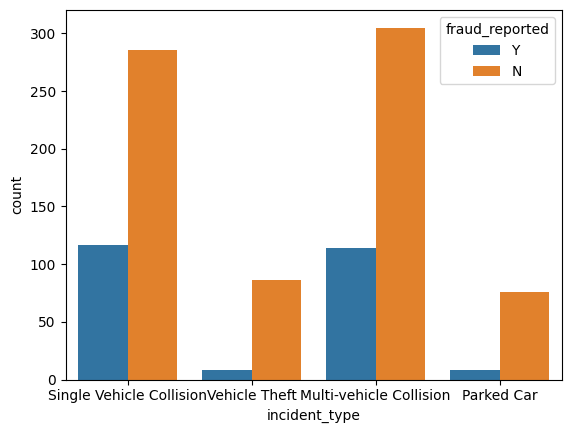

In [17]:
sns.countplot(x='incident_type', data=data, hue='fraud_reported') 

<Axes: xlabel='insured_sex', ylabel='count'>

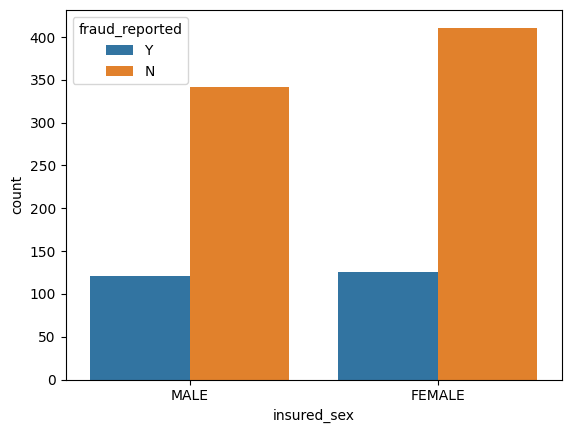

In [18]:
sns.countplot(x='insured_sex', data=data, hue='fraud_reported') 

<Axes: xlabel='incident_type', ylabel='count'>

<Figure size 1000x800 with 0 Axes>

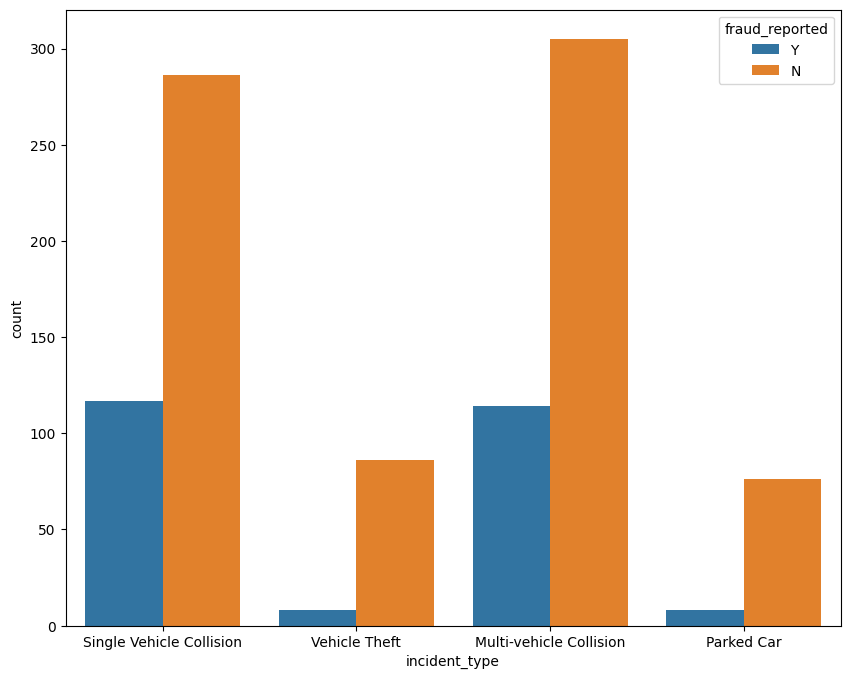

In [19]:
fig = plt.figure(figsize=(10, 8))
fig = plt.figure(figsize=(10, 8))
sns.countplot(x='incident_type', data=data, hue='fraud_reported') 

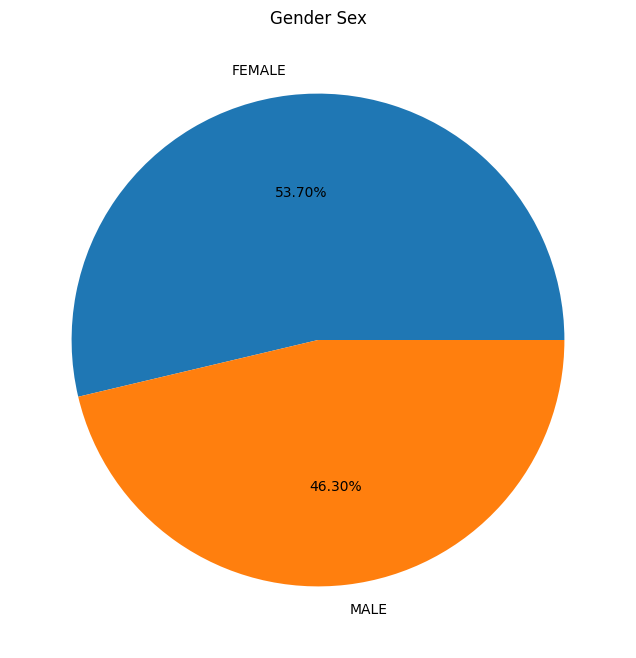

In [20]:
fig = plt.figure(figsize=(10, 8))

sex_counts = (data['insured_sex'].value_counts() * 100) / len(data)
plt.pie(sex_counts, autopct='%.2f%%', labels=sex_counts.index)
plt.title('Gender Sex')
plt.show()


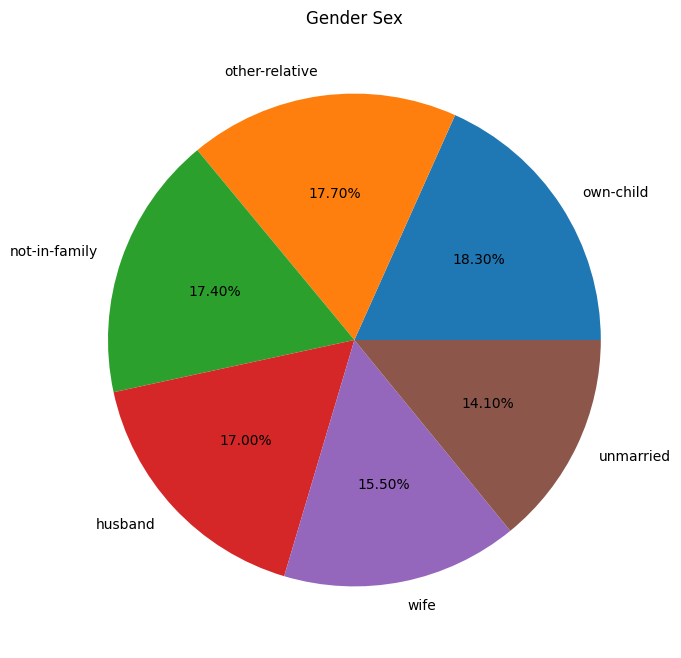

In [21]:
fig = plt.figure(figsize=(10, 8))

sex_counts = (data['insured_relationship'].value_counts() * 100) / len(data)
plt.pie(sex_counts, autopct='%.2f%%', labels=sex_counts.index)
plt.title('Gender Sex')
plt.show()


In [22]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [24]:
data.property_damage.value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [25]:
data.police_report_available.value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [26]:
data.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [27]:
data.replace('?', np.nan, inplace=True)

In [28]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [29]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type']).mode()[0]
data['authorities_contacted'] = data['authorities_contacted'].fillna(data['authorities_contacted']).mode()[0]
data['property_damage'] = data['property_damage'].fillna(data['property_damage']).mode()[0]
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available']).mode()[0]

In [30]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [33]:
data['insured_sex'] = le.fit_transform(data['insured_sex'])
data['insured_relationship'] = le.fit_transform(data['insured_relationship'])
data['incident_type'] = le.fit_transform(data['incident_type'])
data['months_as_customer'] = le.fit_transform(data['months_as_customer'])
data['policy_number'] = le.fit_transform(data['policy_number'])
data['policy_bind_date'] = le.fit_transform(data['policy_bind_date'])
data['incident_location'] = le.fit_transform(data['incident_location'])
data['collision_type'] = le.fit_transform(data['collision_type'])
data['incident_state'] = le.fit_transform(data['incident_state'])

data['authorities_contacted'] = le.fit_transform(data['authorities_contacted'])
data['property_damage'] = le.fit_transform(data['property_damage'])
data['incident_severity'] = le.fit_transform(data['incident_severity'])
data['incident_city'] = le.fit_transform(data['incident_city'])
data['insured_hobbies'] = le.fit_transform(data['insured_hobbies'])
data['police_report_available'] = le.fit_transform(data['police_report_available'])

data['property_claim'] = le.fit_transform(data['property_claim'])
data['auto_make'] = le.fit_transform(data['auto_make'])
data['incident_state'] = le.fit_transform(data['incident_state'])
data['insured_occupation'] = le.fit_transform(data['insured_occupation'])

data['insured_education_level'] = le.fit_transform(data['insured_education_level'])
data['auto_model'] = le.fit_transform(data['auto_model'])
data['policy_state'] = le.fit_transform(data['policy_state'])
data['fraud_reported'] = le.fit_transform(data['fraud_reported'])


In [34]:
data['policy_csl'] = le.fit_transform(data['policy_csl']) 
data['incident_date'] = le.fit_transform(data['incident_date']) 

In [35]:
data.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,48,480,940,2,1,1000,1406.91,0,466132,...,2,0,71610,6510,512,52080,10,1,2004,1
1,212,42,257,635,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,45,3510,8,12,2007,1
2,123,29,672,413,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,104,23100,4,30,2007,0
3,239,41,140,19,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,249,50720,3,34,2014,1
4,212,44,286,922,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,36,4550,0,31,2009,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int64  
 4   policy_state                 1000 non-null   int64  
 5   policy_csl                   1000 non-null   int64  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int64  
 11  insured_education_level      1000 non-null   int64  
 12  insured_occupation           1000 non-null   int64  
 13  insured_hobbies    

# Heatmap (Correlation)

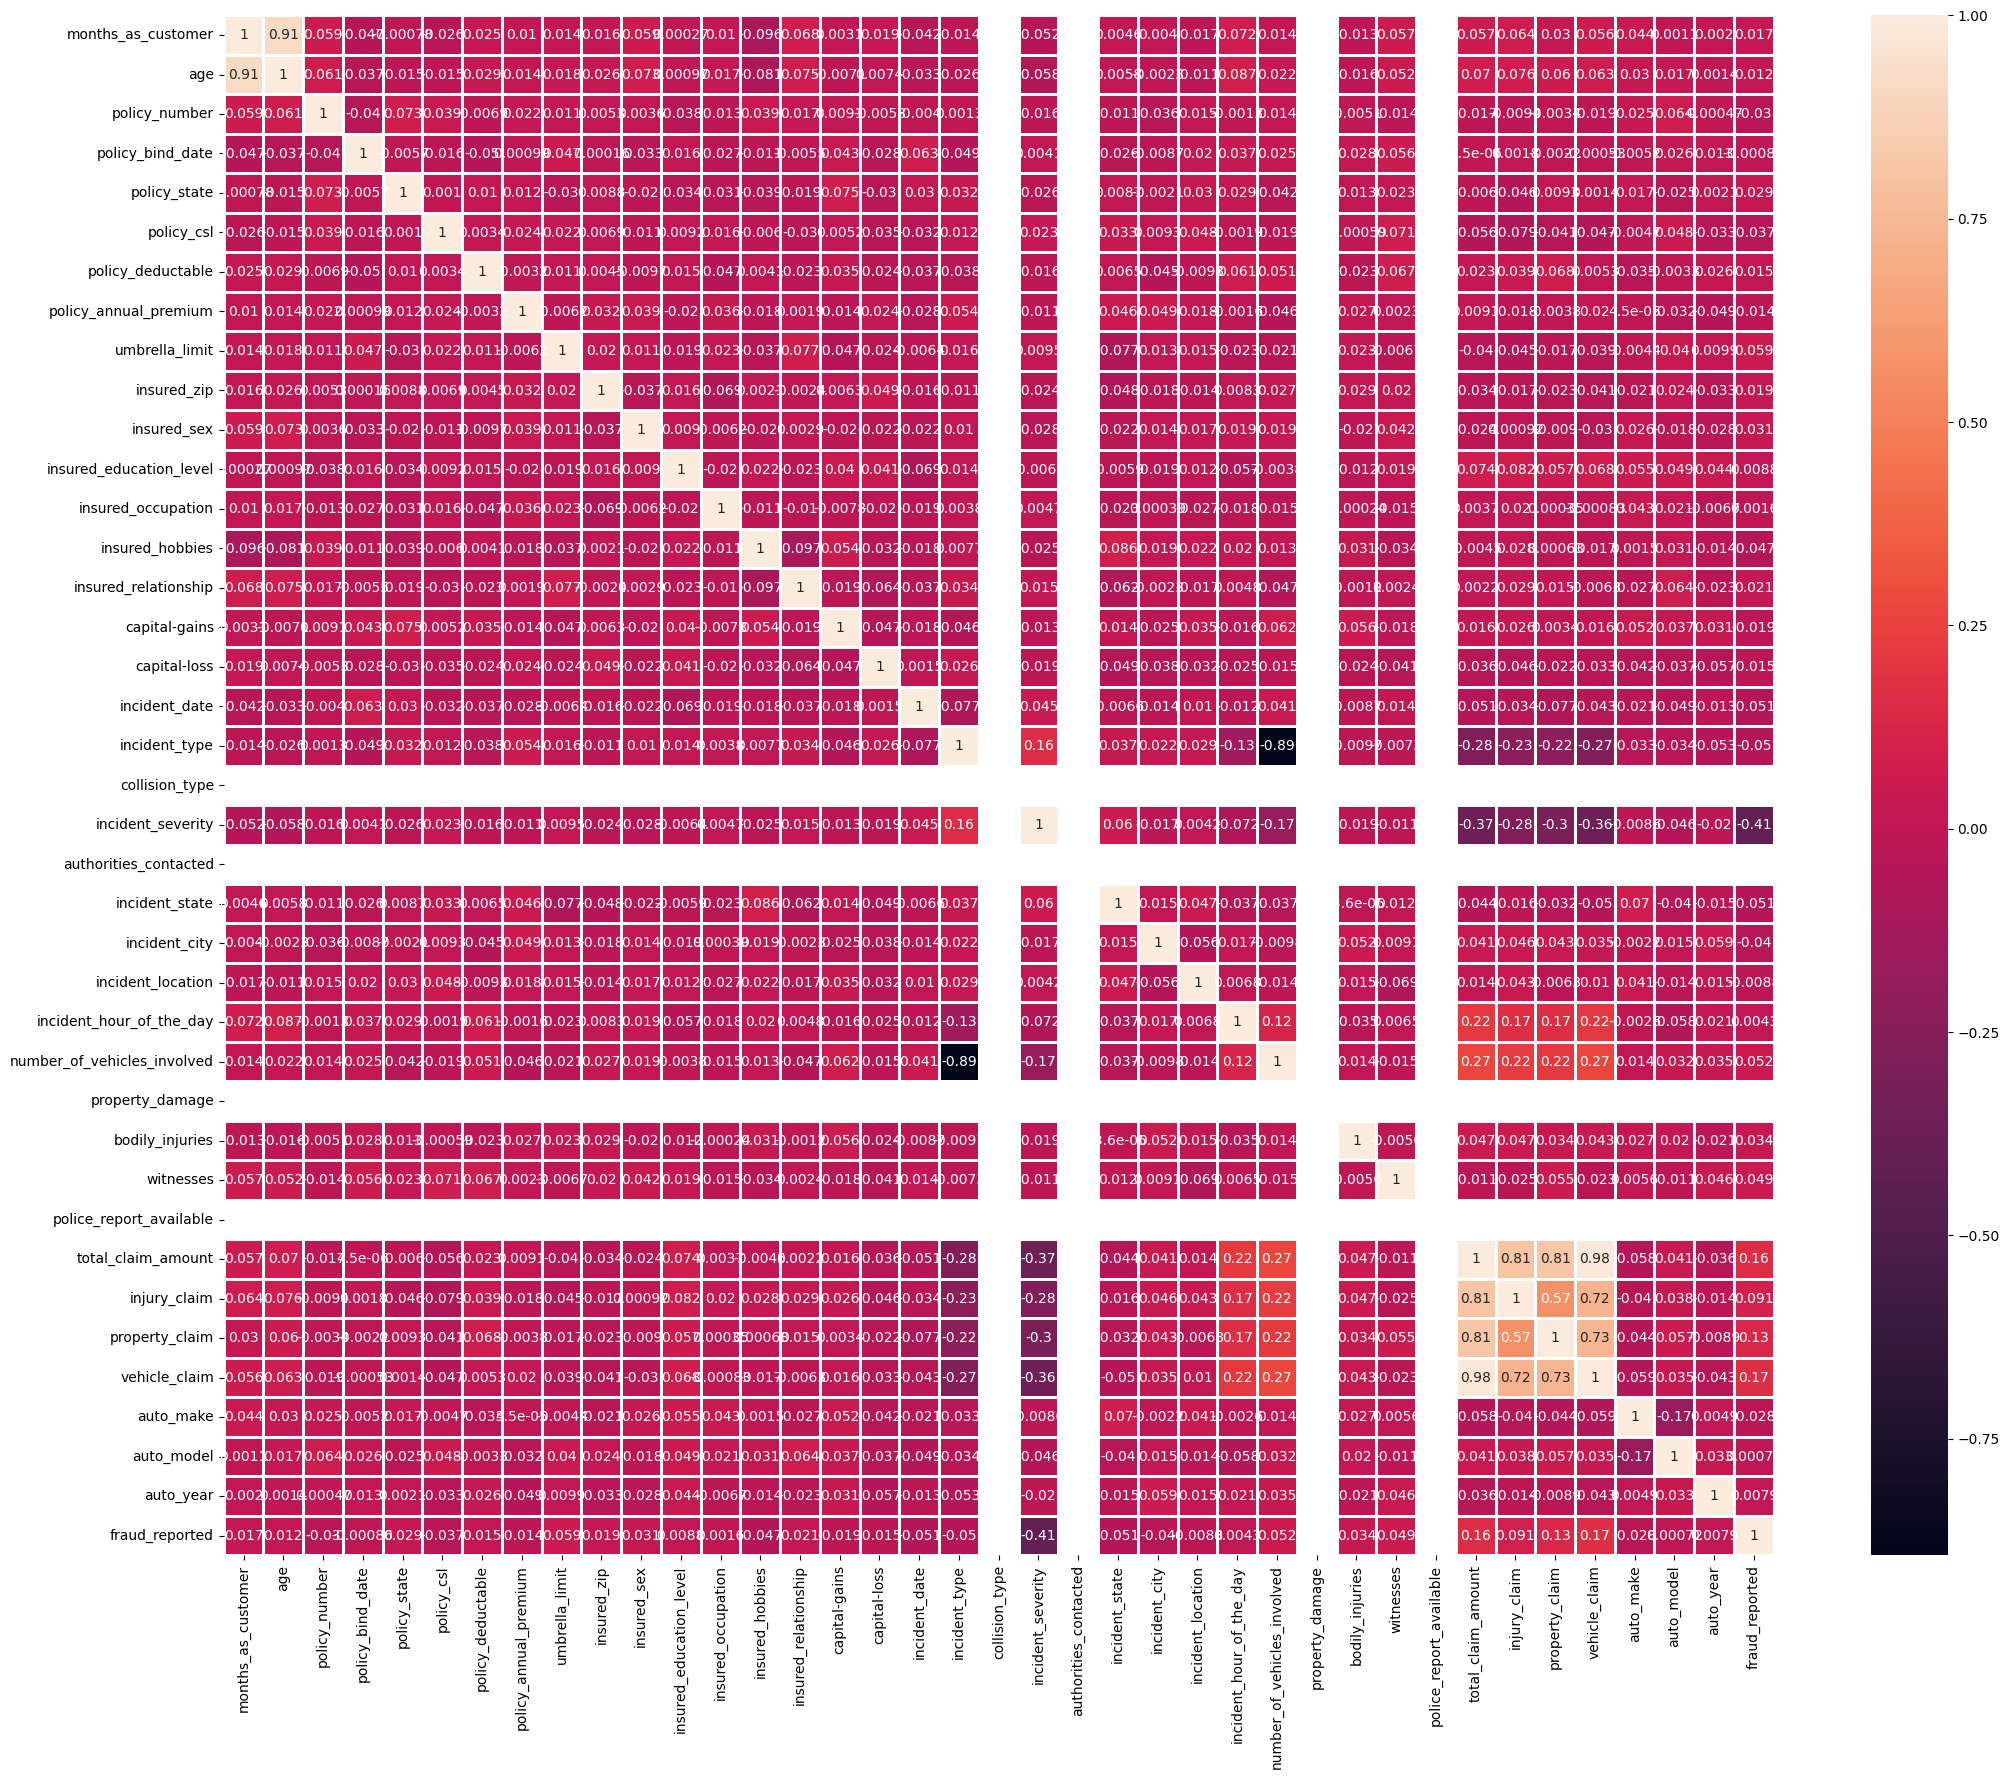

In [37]:
plt.figure(figsize=(25, 20))
sns.heatmap(data=data.corr(), annot=True, fmt='.2g', linewidths=1)
plt.show()

In [38]:
corres = data.corr()['fraud_reported']
columns = corres[corres > .001].index
corres = corres.filter(columns)
corres.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.133952
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
insured_zip                    0.019368
months_as_customer             0.017095
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

In [39]:
feat = ['vehicle_claim', 'total_claim_amount', 'property_claim', 'injury_claim', 'umbrella_limit', 
        'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'insured_relationship', 
        'insured_zip', 'months_as_customer', 'policy_deductable', 'age', 'insured_education_level', 
        'auto_year', 'incident_hour_of_the_day', 'insured_occupation' ]

In [40]:
X = data[feat]
y = data.fraud_reported

In [41]:
X.shape

(1000, 18)

In [42]:
y.shape

(1000,)

# Splitting the Dataset

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance The Dataset (X, y)

In [44]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [45]:
y_train.value_counts()

fraud_reported
0    565
1    185
Name: count, dtype: int64

In [46]:
smot = SMOTE()
X_train, y_train = smot.fit_resample(X_train, y_train)

In [47]:
np.bincount(y_train)

array([565, 565])

# Model Implementation

In [48]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [49]:
def get_stacking():
    level_0 = list()  # Base model
    level_0.append(("DT", DecisionTreeClassifier(max_depth=10, random_state=5)))  # Decision Tree
    level_0.append(("RF", RandomForestClassifier(n_estimators=500)))  # Random Forest
    level_0.append(("KNN", KNeighborsClassifier(5)))
    level_0.append(("XGB", XGBClassifier(objective='binary:logistic')))
    
    level_1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=10)
    return model

def get_models():
    models = dict()
    models['DT'] = DecisionTreeClassifier(max_depth=10)
    models['RF'] = RandomForestClassifier(n_estimators=500)
    models['KNN'] = KNeighborsClassifier(5)
    models['XGB'] = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
    models['Stacking'] = get_stacking()
    
    return models

models = get_models()

def evaluate_model(models, X, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=5)
    scores = cross_val_score(models, X, y, scoring='accuracy', cv=cv, error_score='raise')
    return scores

result, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    result.append(scores)
    names.append(name)
    print(f'name: {name}, score: {mean(scores)}, std: {std(scores)}')

name: DT, score: 0.6932153392330385, std: 0.04325332831449906
name: RF, score: 0.8235988200589971, std: 0.03238932679955351
name: KNN, score: 0.6938053097345134, std: 0.03439583680742987
name: XGB, score: 0.8182890855457229, std: 0.037526947241980524
name: Stacking, score: 0.8324483775811209, std: 0.03619554371723414


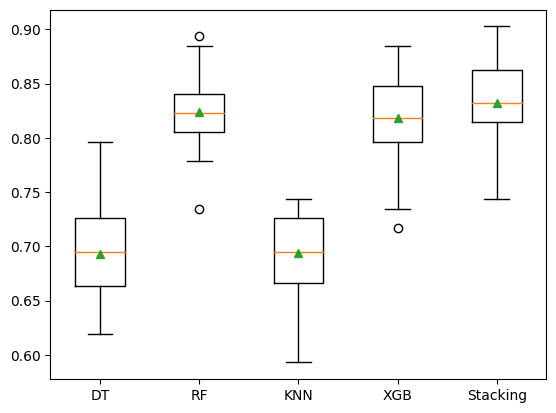

In [50]:
plt.boxplot(result, labels=names, showmeans=True)
plt.show()

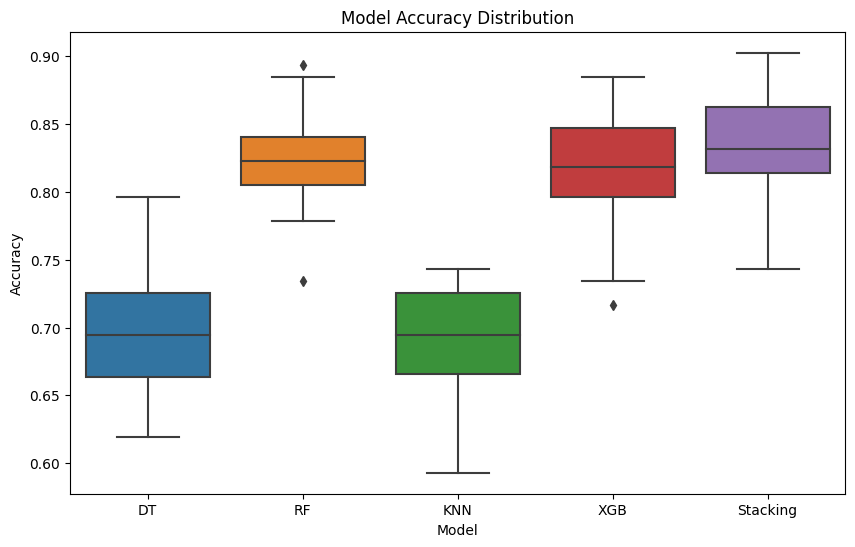

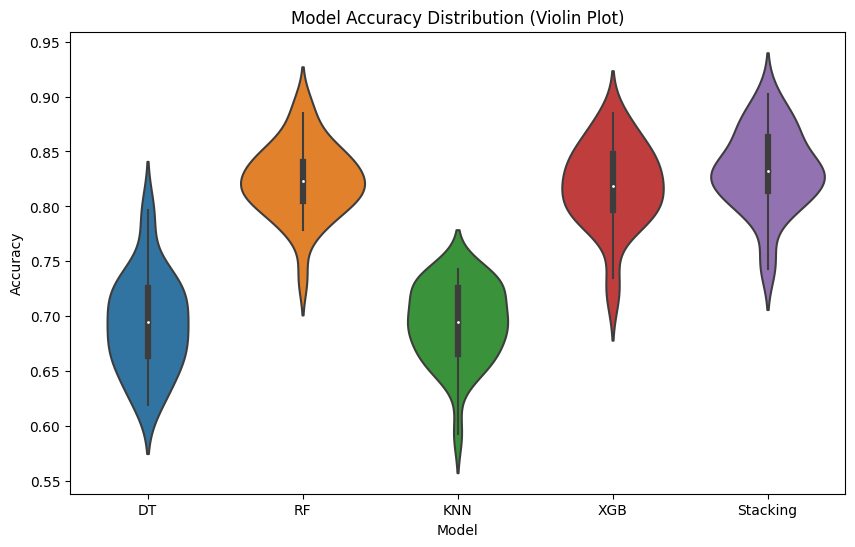

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


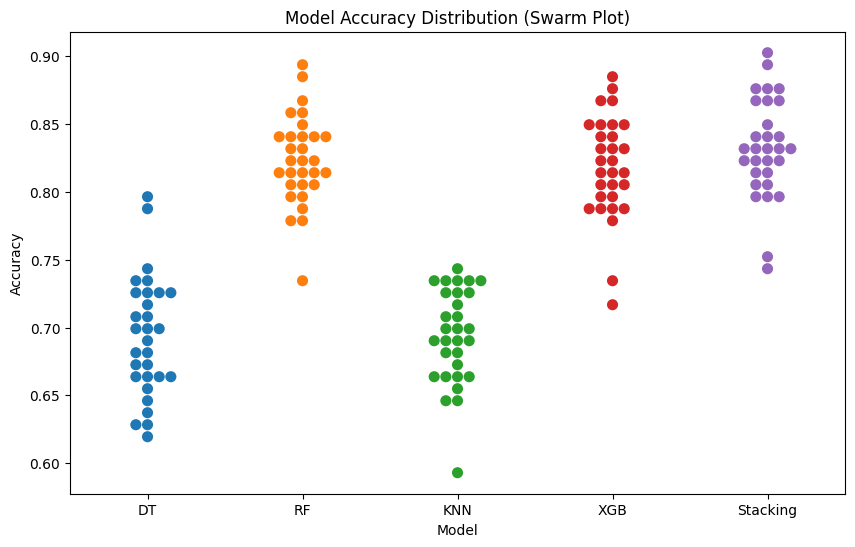

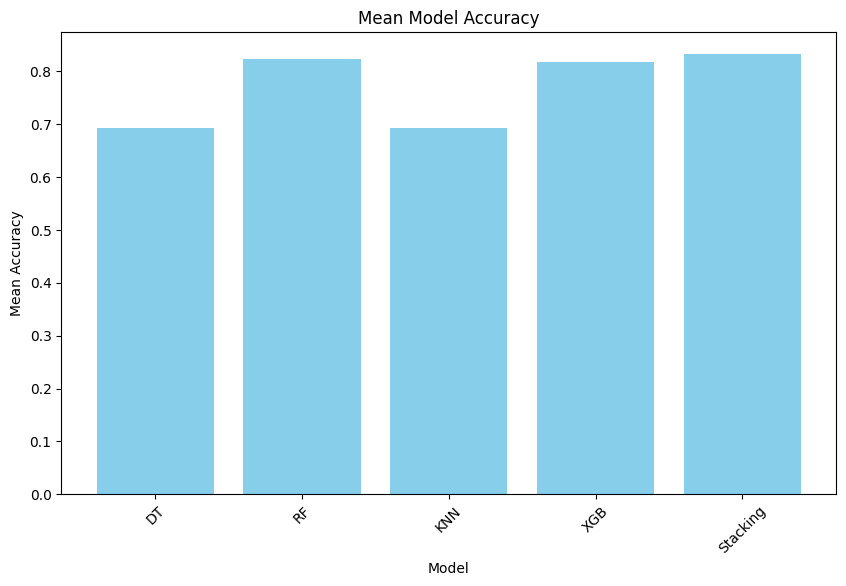

In [51]:
# Box plot of model accuracies
plt.figure(figsize=(10, 6))
sns.boxplot(data=result)
plt.xticks(ticks=range(len(names)), labels=names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Distribution')
plt.show()

# Violin plot of model accuracies
plt.figure(figsize=(10, 6))
sns.violinplot(data=result)
plt.xticks(ticks=range(len(names)), labels=names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Distribution (Violin Plot)')
plt.show()

# Swarm plot of model accuracies
plt.figure(figsize=(10, 6))
sns.swarmplot(data=result, size=8)
plt.xticks(ticks=range(len(names)), labels=names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Distribution (Swarm Plot)')
plt.show()

# Bar plot of mean model accuracies
mean_accuracies = [mean(scores) for scores in result]
plt.figure(figsize=(10, 6))
plt.bar(names, mean_accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Model Accuracy')
plt.xticks(rotation=45)
plt.show()


# Implement Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
#  Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.644
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       188
           1       0.17      0.11      0.14        62

    accuracy                           0.64       250
   macro avg       0.45      0.47      0.46       250
weighted avg       0.60      0.64      0.62       250

Confusion Matrix:
[[154  34]
 [ 55   7]]


# Implement KNN

In [56]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn_classifier.predict(X_test)

In [58]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.53      0.63       188
           1       0.28      0.56      0.38        62

    accuracy                           0.54       250
   macro avg       0.54      0.55      0.51       250
weighted avg       0.66      0.54      0.57       250

Confusion Matrix:
[[100  88]
 [ 27  35]]


# Implement Logistic Regression

In [59]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
y_pred = log_reg.predict(X_test)

In [61]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.49      0.61       188
           1       0.28      0.61      0.39        62

    accuracy                           0.52       250
   macro avg       0.54      0.55      0.50       250
weighted avg       0.67      0.52      0.55       250

Confusion Matrix:
[[92 96]
 [24 38]]


# Implement XGBoost

In [62]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred = xgb_classifier.predict(X_test)

In [64]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.672
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       188
           1       0.24      0.15      0.18        62

    accuracy                           0.67       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.62      0.67      0.64       250

Confusion Matrix:
[[159  29]
 [ 53   9]]
